In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [41]:
##step 1 read the data set
df=pd.read_csv("height_weight.csv")
df.head()

,weight,height
0,45,120
1,56,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

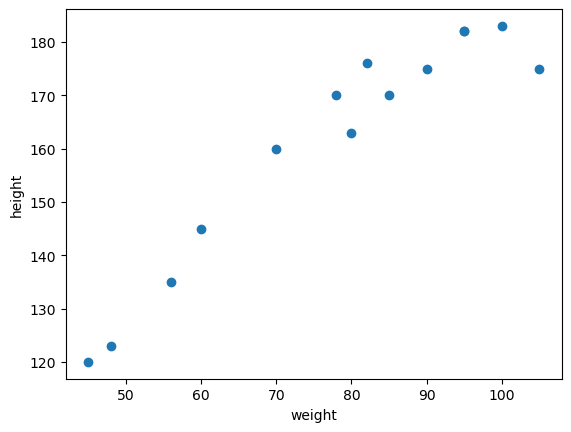

In [42]:
plt.scatter(df['weight'],df['height'])
plt.xlabel("weight")
plt.ylabel("height")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  14 non-null     int64
 1   height  14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [44]:
df.describe()

,weight,height
count,14.000000,14.000000
mean,77.785714,161.357143
std,19.343767,21.847750
min,45.000000,120.000000
25%,62.500000,148.750000
50%,81.000000,170.000000
75%,93.750000,175.750000
max,105.000000,183.000000


In [45]:
df.isnull().sum()  ##to check if there is any missing value

weight    0
height    0
dtype: int64

In [46]:
##step 2 divide our data set into independent and dependent features
X=df[['weight']]  ##independent feature
y=df['height'] ##dependent feature


In [47]:
X.shape,y.shape


((14, 1), (14,))

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
##dividing the dataset into train and test
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)  ##20%of the records is moved to the tests

In [50]:
X_train.shape,x_test.shape

((11, 1), (3, 1))

In [51]:
y_train.shape,y_test.shape

((11,), (3,))

In [52]:
##standard scaling on the train and test data


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
##creating an object 
scaler=StandardScaler()

In [55]:
X_train=scaler.fit_transform(X_train)

In [56]:
X_test=scaler.transform(x_test)

In [57]:
X_test

array([[ 0.24645051],
       [ 1.63205002],
       [-1.98255741]])

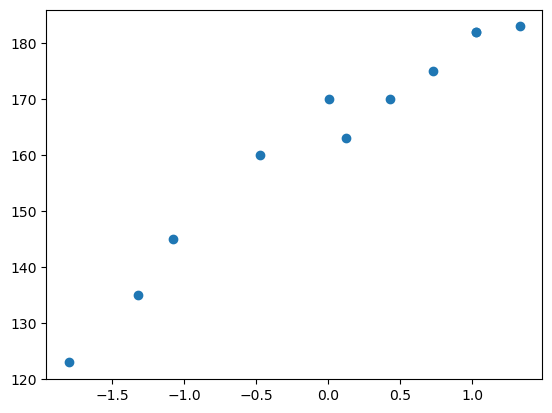

In [58]:
plt.scatter(X_train,y_train)

In [59]:
##Model trainig 

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
regressor=LinearRegression()

In [62]:
regressor.fit(X_train,y_train)

LinearRegression()

In [63]:
regressor.intercept_

162.54545454545453

In [64]:
regressor.coef_  ##slope of the line

array([18.85371273])

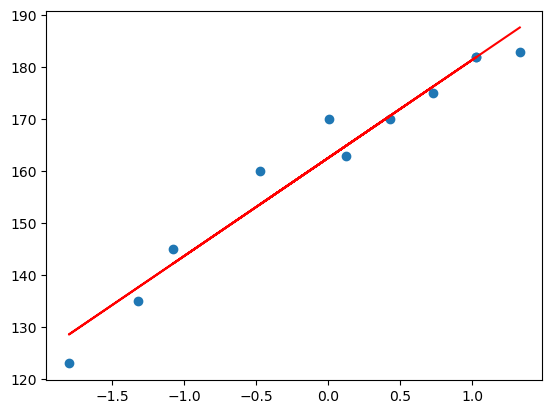

In [65]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

prediction of train data
1.predicted height output=intercept+coef_(Weights)
2.y_pred_train=162.5+18.85(X_train)

prediction of test data

1.predicted height output=intercept +coef_(Weights)
2.y_pred_test = 162.5+18.85(X_test)

In [66]:
##prediction for test data
y_pred_test=regressor.predict(X_test)

In [67]:
y_pred_test

array([167.19196161, 193.31565687, 125.16688662])

In [68]:
y_test

9     176
11    175
0     120
Name: height, dtype: int64

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [70]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

146.58051474048315
10.763527294541092
12.10704401332064


In [71]:
##Accuracy of the model 

In [36]:
from sklearn.metrics import r2_score

In [37]:
score=r2_score(y_test,y_pred_test)

In [38]:
score

0.7859096668834229